In [1]:
import nrrd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
path1 = os.path.join('usr', 'local', 'data', 'nrrd_files', 'example.nrrd')
print(os.path.basename(path1))  # Output: example.nrrd

example.nrrd


In [3]:
import datasets

arr1 = [ 'abc', 'bcd', 'cde' ]
seg_types = ['type1', 'type2', 'type3']
seg_paths_train = {}
seg_paths_train[seg_types[0]] = [ 'path1', 'path2', 'path3' ]
seg_paths_train[seg_types[1]] = [ 'path1', 'path2', 'path3' ]
seg_paths_train[seg_types[2]] = [ 'path1', 'path2', 'path3' ]
print(seg_paths_train)
a = {
    'image' : arr1,
    **{"seg_{}".format(seg_type): seg_paths_train[seg_type] for seg_type in seg_types}
}
dataset_train = datasets.Dataset.from_dict(a)
print(a)
print(len(a))
print(dataset_train)

{'type1': ['path1', 'path2', 'path3'], 'type2': ['path1', 'path2', 'path3'], 'type3': ['path1', 'path2', 'path3']}
{'image': ['abc', 'bcd', 'cde'], 'seg_type1': ['path1', 'path2', 'path3'], 'seg_type2': ['path1', 'path2', 'path3'], 'seg_type3': ['path1', 'path2', 'path3']}
4
Dataset({
    features: ['image', 'seg_type1', 'seg_type2', 'seg_type3'],
    num_rows: 3
})


/home/patrick-do/Documents/Projects/synthetic-CT-slices/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data shape: (512, 666, 175)


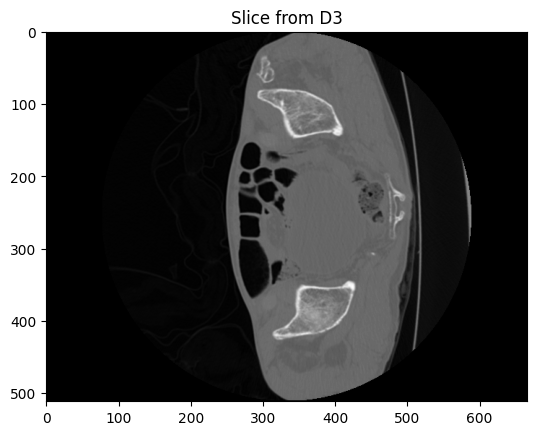

666


In [4]:
datafolder = 'data_AVT/AVT'
cohort = 'Dongyang'

total_slices = 0
for i in [3]:
    subject = f'D{i}'
    filename = f'../{datafolder}/{cohort}/{subject}/{subject}.nrrd'
    data, header = nrrd.read(filename)

    print(f"Data shape: {data.shape}")
    # print(f"Header: {header}")
    total_slices += data.shape[1]
    
    # Plot one slice as an example
    
    plt.imshow(data[:, :, 0], cmap='gray')
    plt.title(f'Slice from {subject}')
    plt.show()

    # print(f"Max value: {np.max(data)}")
    # print(f"Min value: {np.min(data)}")
print(total_slices)

In [5]:
datafolder = 'data_AVT/AVT'
cohort = 'Rider'

for i in [18]:
    subject = f'R{i}'
    filename = f'../{datafolder}/{cohort}/{subject}/{subject}.seg.nrrd'
    data, header = nrrd.read(filename)

    print(f"Number of segmentation classes:", np.unique(data))

Number of segmentation classes: [0 1]


In [6]:
import torch
print(torch.cuda.device_count())
for i in range(torch.cuda.device_count()):
    print(i, torch.cuda.get_device_name(i))


0


/home/patrick-do/Documents/Projects/synthetic-CT-slices/.venv/lib/python3.11/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on {device}")

Running on cpu


In [8]:
# import os
# from pathlib import Path
# from collections import defaultdict

# def dircos_to_orientation(matrix):
#     """
#     matrix: 3x3 numpy array where columns are direction cosines of x,y,z axes
#     Returns a 3-letter code, e.g. "RAI".
#     """
#     ax_codes = []
#     labels = np.array([['R', 'L'],   # X axis  +R / -L
#                        ['A', 'P'],   # Y axis  +A / -P
#                        ['S', 'I']])  # Z axis  +S / -I
#     for i in range(3):      # X, Y, Z columns
#         col = matrix[:, i]
#         # choose the axis with the largest absolute component
#         major_axis = np.argmax(np.abs(col))
#         sign = 0 if col[major_axis] >= 0 else 1
#         ax_codes.append(labels[major_axis, sign])
#     return ''.join(ax_codes)

# def scan_nrrd_orientation(root_dirs):
#     """Return dict: {cohort: {orientation_code: [file1, file2, ...]}}"""
#     summary = defaultdict(lambda: defaultdict(list))
#     for cohort_dir in root_dirs:
#         cohort = Path(cohort_dir).name
#         for f in Path(cohort_dir).rglob('*.nrrd'):
#             data, hdr = nrrd.read(str(f), index_order='F')  # data ignored
#             # parse space directions → 3×3 direction cosine matrix
#             dirs = hdr['space directions']                  # list of 3 tuples
#             dirs = np.array(dirs, dtype=float)              # shape (3,3)
#             # normalise to unit vectors (strip voxel spacing)
#             dircos = dirs / np.linalg.norm(dirs, axis=0)
#             code = dircos_to_orientation(dircos)
#             summary[cohort][code].append(str(f))
#     return summary

# # ----  edit these paths to your actual folders  ----
# cohort_roots = [
#     '../data_AVT/AVT/Dongyang',
#     '../data_AVT/AVT/KiTS',
#     '../data_AVT/AVT/Rider'
# ]

# report = scan_nrrd_orientation(cohort_roots)

# # pretty print
# for cohort, codes in report.items():
#     print(f'\nCohort: {cohort}')
#     if len(codes) == 1:
#         code = next(iter(codes))
#         print(f'all files share orientation {code}  (n={len(codes[code])})')
#     else:
#         print('mixed orientations detected:')
#         for code, files in codes.items():
#             print(f'    {code}: {len(files)} file(s)')
